In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.FCMBased.ANM.ANM import ANM

from dataset import EarthSystemsDataset


### Assumptions

Made by PC algorithm:
- **Causal Markov Assumption:** A node is independent of its non-descendents, given its parents
- **Faithfulness Assumption:** The d-separation within the graph actually represents the conditional independences in the data. 

In [2]:
data_var_names = ['global_temp', 'electricity', 'co2', 'ch4']
y_vals = ['temp_change']
lags = 15

earth_data = EarthSystemsDataset(data_var_names, y_vals=y_vals, val_frac=0.1, lags=lags, mode='ann')
earth_data.data

temp_change  elec_generation  co2_average  ch4_average
year month                                                        
1983 Jul           0.18          220.447       342.14      1625.94
     Aug           0.35          230.193       340.62      1628.06
     Sep           0.37          195.817       340.53      1638.44
     Oct           0.17          183.137       341.75      1644.79
     Nov           0.30          183.171       342.83      1642.60
...                 ...              ...          ...          ...
2015 Apr           0.76          294.177       400.96      1833.15
     May           0.80          322.189       400.91      1831.66
     Jun           0.81          362.493       400.06      1827.25
     Jul           0.73          400.535       398.37      1824.69
     Aug           0.79          392.242       397.06      1829.16

[386 rows x 4 columns]

In [3]:
cg = pc(earth_data.data.to_numpy())

  0%|          | 0/4 [00:00<?, ?it/s]

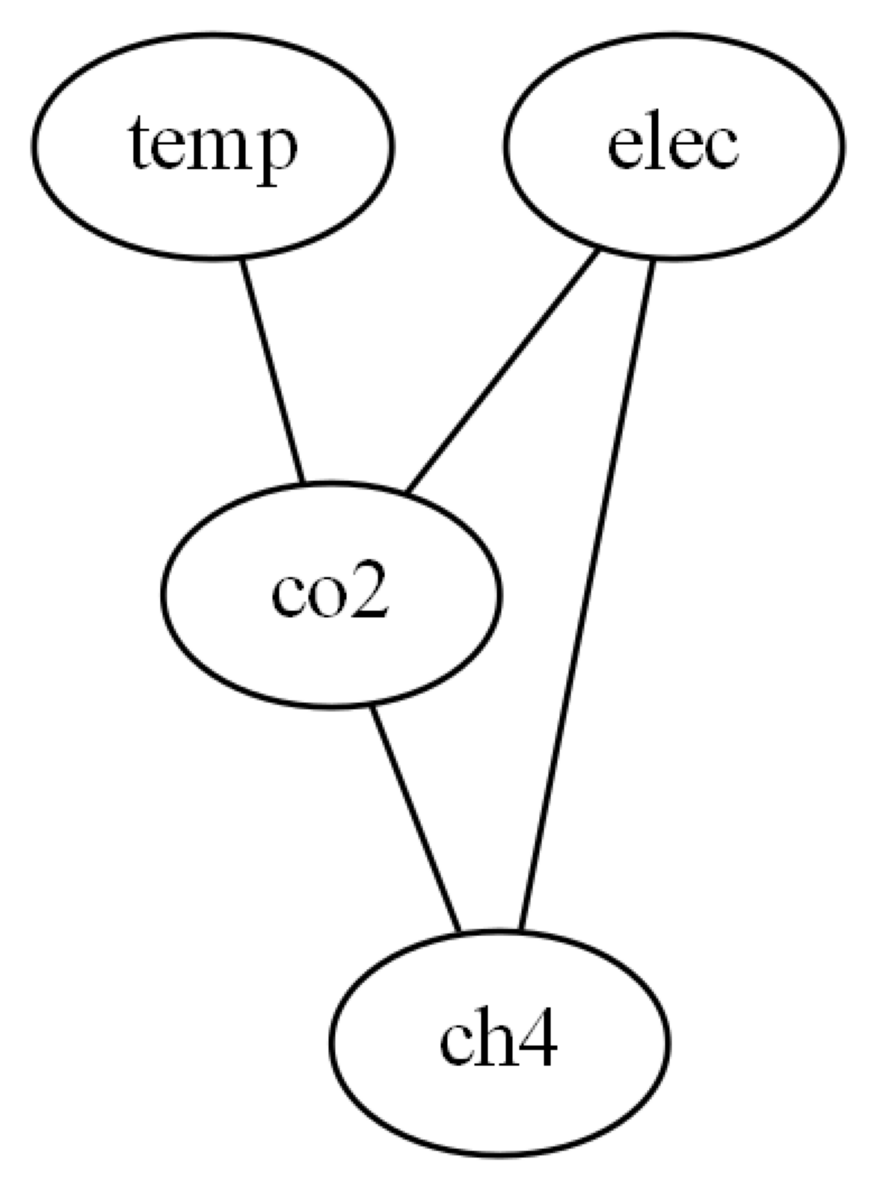

In [5]:
cg.draw_pydot_graph(labels=['temp', 'elec', 'co2', 'ch4'])

In [52]:
cg.G.graph

array([[ 0,  0, -1,  0],
       [ 0,  0, -1, -1],
       [-1, -1,  0, -1],
       [ 0, -1, -1,  0]])

In [35]:
from scipy.stats import linregress
x, y = earth_data.data['temp_change'], earth_data.data['co2_average']
anm = ANM()
p_xy, p_yx = anm.cause_or_effect(x.to_numpy().reshape(-1,1), y.to_numpy().reshape(-1,1))

In [36]:
p_xy, p_yx

(1.8304705351468442e-07, 0.2753031593775984)

### Manual verification that CO2 affects global_temp

Text(0.5, 1.0, 'Residuals of y --> x')

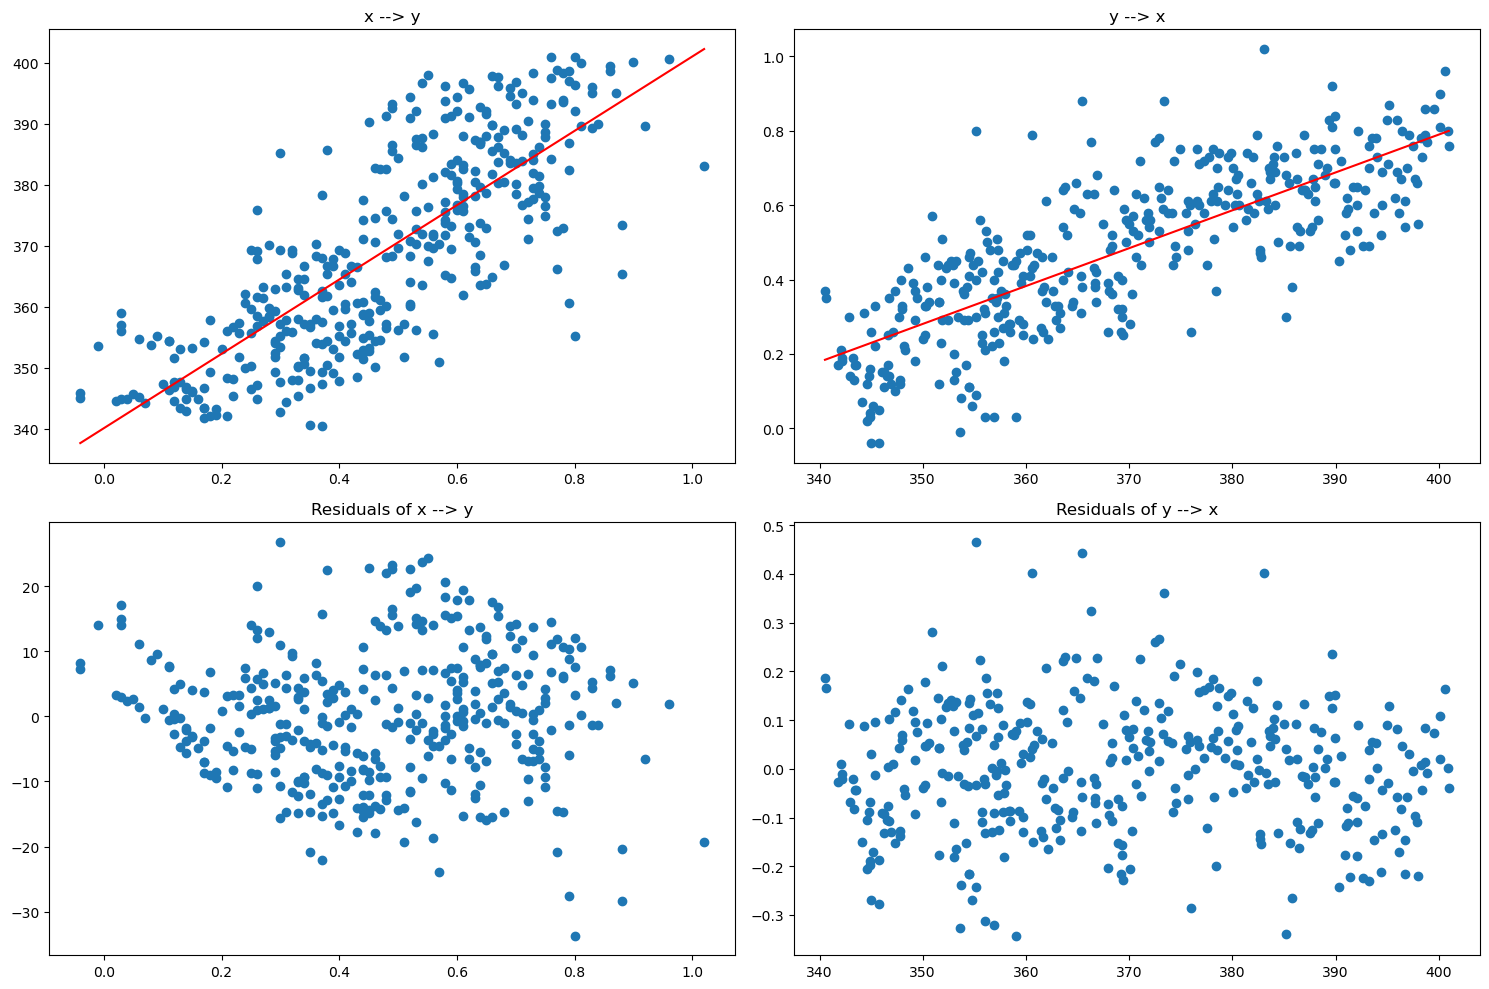

In [51]:
# testing causal relationship in x --> y
reg_xy = linregress(x,y)
m_xy, b_xy = reg_xy.slope, reg_xy.intercept

# testing causal relationship in y --> x
reg_yx = linregress(y,x)
m_yx, b_yx = reg_yx.slope, reg_yx.intercept


t_xy = np.linspace(x.min(), x.max(), 2500)
t_yx = np.linspace(y.min(), y.max(), 2500)

# Plot lines of best fit and residuals
fig, axes = plt.subplots(2, 2, figsize=(15,10))

# Plot points and regression line for x --> y
axes[0,0].scatter(x,y)
axes[0,0].plot(t_xy, m_xy*t_xy + b_xy, color='red')
axes[0,0].set_title('x --> y')

# Plot points and regression line for y --> x
axes[0,1].scatter(y,x)
axes[0,1].plot(t_yx, m_yx*t_yx + b_yx, color='red')
axes[0,1].set_title('y --> x')

# Plot residuals for x --> y
axes[1,0].scatter(x, y - (m_xy*x + b_xy))
axes[1,0].set_title('Residuals of x --> y')

# Plot residuals for y --> x
axes[1,1].scatter(y, x - (m_yx*y + b_yx))
axes[1,1].set_title('Residuals of y --> x')


It looks like y is coordinated with the residuals predicting y --> x, so we conclude that y --> x is true.

(is this interpretation right?)